#1. Import Library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from collections import Counter

#2. Load Data

Ini merupakan dataset mentah / raw hasil scrapping dari ulasan google play store dengan jumlah ulasan sebaganya 500.000. Ulasan tersebut berasal dari periode Maret 2021 sampai dengan September 2024.

Dataset tersebut terdiri dari 4 kolom

- Username : Berisi nama yang memberikan ulasan
- Score : Berisi rating yang diberikan
- at : berisi waktu diberikan ulasan dalam format date time (hari dan tanggal)
- Content : berisi ulasan yang diberikan

In [ ]:
!gdown 1uruPHNwLV0hOxswoHjWQUpCXsHm4pA5w

Downloading...
From: https://drive.google.com/uc?id=1uruPHNwLV0hOxswoHjWQUpCXsHm4pA5w
To: /content/Tokopedia.csv
100% 44.7M/44.7M [00:00<00:00, 57.1MB/s]


In [ ]:
df = pd.read_csv('/content/Tokopedia.csv')
df

,userName,score,at,content
0,Pengguna Google,5,2024-09-08 03:31:50,makasih toped
1,Pengguna Google,1,2024-09-08 03:29:56,Aplikasi php sudah banyak dikasih promo &sudah...
2,Pengguna Google,5,2024-09-08 03:26:38,mantab... 👍
3,Pengguna Google,5,2024-09-08 03:25:14,Good good
4,Pengguna Google,1,2024-09-08 03:24:01,Sangat buruk sebagai pengguna lama akun affali...
...,...,...,...,...
499995,Aara Nindya,5,2021-03-24 14:15:11,Sangat bagus
499996,Fitri Afnita yanti,5,2021-03-24 14:15:09,dengan aplikasi ini saya mudah2 saya bisa menj...
499997,Siti Aisyah,5,2021-03-24 14:14:49,sangat membantu
499998,Rohmat Gombik,5,2021-03-24 14:14:42,sangat memuaskan


##2.1 Handling Missing Value

In [ ]:
df.isnull().sum()

,0
userName,0
score,0
at,0
content,1


In [ ]:
new_df = df['content'].mode()[0]
df['content'].fillna(new_df, inplace=True)

In [ ]:
df.isnull().sum()

,0
userName,0
score,0
at,0
content,0


In [ ]:
new_df = df.loc[0:5000, ['score', 'content']]
new_df

,score,content
0,5,makasih toped
1,1,Aplikasi php sudah banyak dikasih promo &sudah...
2,5,mantab... 👍
3,5,Good good
4,1,Sangat buruk sebagai pengguna lama akun affali...
...,...,...
4996,3,"Sumpah gk ngerti cara pesennya kek gimana, bin..."
4997,1,Pusat Resolusinya tidak membantu ketika ada ke...
4998,5,"Tolong dong min untuk pengguna affiliate nya, ..."
4999,5,mantab banget


#3. Preprocessing

In [ ]:
def filter_token_by_length(dataframe, column, min_words, max_words):
  words_count = dataframe[column].astype(str).apply(lambda x: len(x.split()))
  mask = (words_count >= min_words) & (words_count <= max_words)
  filtered_df = dataframe[mask]
  return filtered_df


min_words = 3
max_words = 50
filtered_df = filter_token_by_length(new_df, 'content', min_words, max_words)

In [ ]:
column_2 = new_df[['score', 'content']]

In [ ]:
column_2

,score,content
0,5,makasih toped
1,1,Aplikasi php sudah banyak dikasih promo &sudah...
2,5,mantab... 👍
3,5,Good good
4,1,Sangat buruk sebagai pengguna lama akun affali...
...,...,...
4996,3,"Sumpah gk ngerti cara pesennya kek gimana, bin..."
4997,1,Pusat Resolusinya tidak membantu ketika ada ke...
4998,5,"Tolong dong min untuk pengguna affiliate nya, ..."
4999,5,mantab banget


In [ ]:
# Normalisasi
norm = {'mantab': 'mantap', 'mantep': 'mantap', 'good': 'bagus',  'gabisa': 'tidak bisa', 'lbh':'lebih', 'vitur': 'fitur', 'ga':'tidak', 'gk':'tidak', 'tokped':'tokopedia', 'bngt':'banget', 'karna':'karena', 'apk':'aplikasi', 'skrng':'sekarang', 'bisa2':'bisa', 'banyakk':'banyak', 'mantapp':'mantap', 'donk':'dong', 'mantabb':'mantap','ok':'oke', 'sy':'saya','sya':'saya','kmn':'kemana','bgs':'bagus','bgt':'banget','tidakk':'tidak','nya':'','yg':''}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

column_2['content'] = column_2['content'].apply(lambda x: normalisasi(x))

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words =  StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

column_2['content'] = column_2['content'].apply(lambda x: stopword(x))
column_2.sample(5)

,score,content
4582,5,keren
3699,5,"aplikasi belanja favorit ku, bak promo guncang..."
931,1,"Olshop aneh, orang tidakpernah belanja malah ..."
474,5,oke
859,5,"Hartidak Murah, gratis ontidakir"


In [ ]:
#Tokenize
tokenized = column_2['content'].apply(lambda x: x.split())
tokenized

,content
0,"[makasih, toped]"
1,"[Aplikasi, php, bak, dikasih, promo, &sudah, d..."
2,"[mantap..., 👍]"
3,"[Good, bagus]"
4,"[Santidakt, buruk, sebatidaki, pengguna, lama,..."
...,...
4996,"[Sumpah, ngerti, cara, pesen, kek, gimana,, bi..."
4997,"[Pusat, Resolusi, membantu, ada, kendala, tran..."
4998,"[Tolong, dong, min, pengguna, affiliate, ,, pa..."
4999,"[mantap, banget]"


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for j in text_cleaning:
    dt = stemmer.stem(j)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  return d_clean

tokenized = tokenized.apply(stemming)

In [ ]:
def label_sentimen(score):
  if score <= 2:
    return 'negatif'
  elif score == 3:
    return 'netral'
  else:
    return 'positif'

column_2['sentimen'] = column_2['score'].apply(label_sentimen)
column_2

,score,content,sentimen
0,5,makasih toped,positif
1,1,Aplikasi php bak dikasih promo &sudah dibayar ...,negatif
2,5,mantap... 👍,positif
3,5,Good bagus,positif
4,1,Santidakt buruk sebatidaki pengguna lama akun ...,negatif
...,...,...,...
4996,3,"Sumpah ngerti cara pesen kek gimana, bingung a...",netral
4997,1,Pusat Resolusi membantu ada kendala transaksi.,negatif
4998,5,"Tolong dong min pengguna affiliate , pas penar...",positif
4999,5,mantap banget,positif


#4. Visualization

<Axes: ylabel='count'>

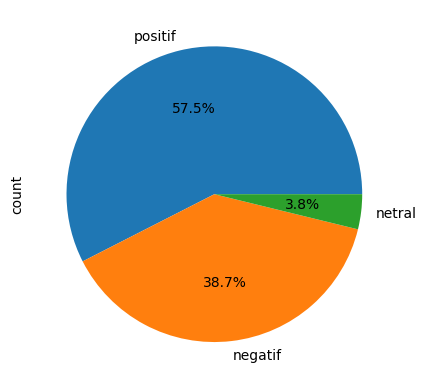

In [ ]:
column_2['sentimen'].value_counts().plot.pie(autopct='%1.1f%%')

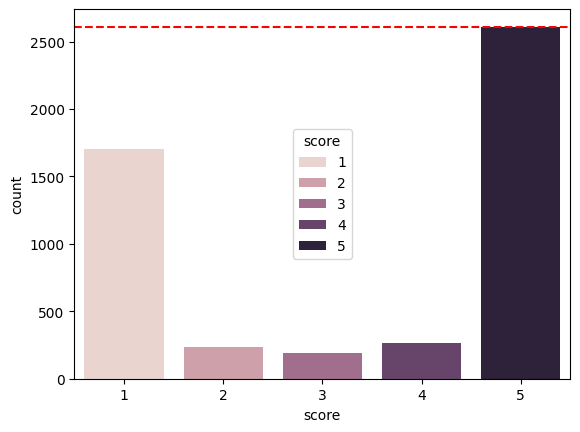

In [ ]:
value = sns.countplot(data=column_2, x='score', hue='score')

max_count = column_2['score'].value_counts().max()
value.axhline(y=max_count, color='red', linestyle='--')

Text(0.5, 1.0, 'Word Cloud')

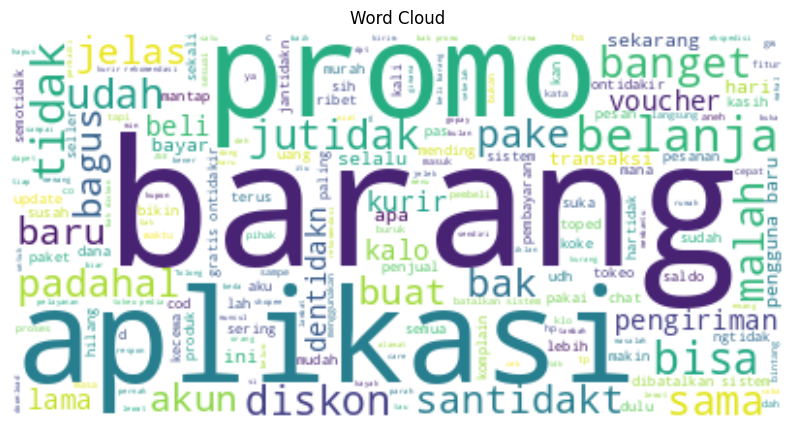

In [ ]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = ''.join(column_2['content'].astype(str).tolist())

stop_words = set(STOPWORDS)
stop_words.update(['nya', 'yg','cuma','mau','kalau', 'tokeopedia','dan','di','yang','saya','ada','lagi','aja','jadi','juga','lagi'])

wc = WordCloud(background_color='white', stopwords=stop_words, max_words=1000)
wc.generate(text)

tokens = text.split()
word_count = Counter(text.split())

top_words = word_count.most_common(10)

word, count = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')

Text(0.5, 1.0, 'Top 10 Words')

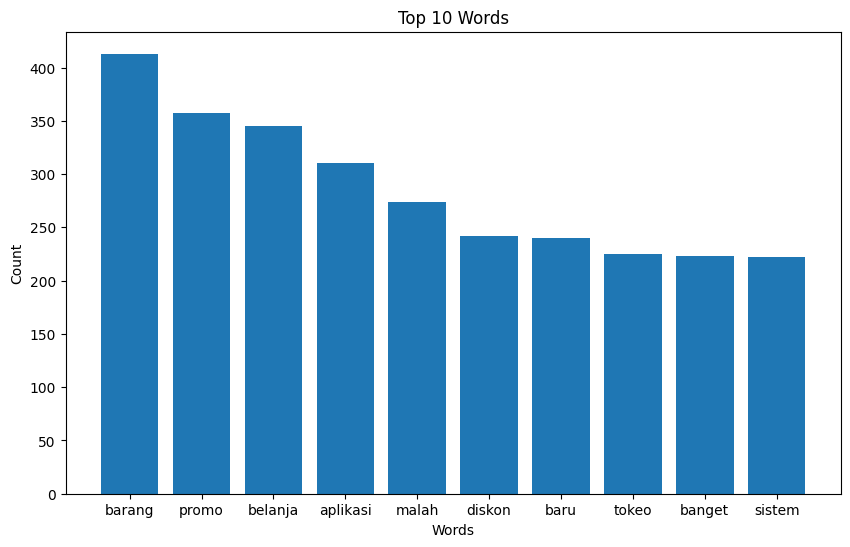

In [ ]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

text = ''.join(column_2['content'].astype(str).tolist())

stop_words = set(STOPWORDS)
stop_words.update(['nya', 'yg','tokeopedia','mau', 'bisa','tokeeopedia','tokeeo', 'yg','cuma','mau','kalau', 'tokeopedia','dan','di','yang','saya','ada','lagi','aja','jadi','juga','lagi','tidak','gak','ga','tapi','ini','sama','udah','sudah','ke'])

wc = WordCloud(background_color='white', stopwords=stop_words, max_words=1000)
wc.generate(text)

tokens = [word for word in text.split() if word not in stop_words]
word_count = Counter(tokens)

top_words = word_count.most_common(10)

word, count = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(word, count)
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 10 Words')

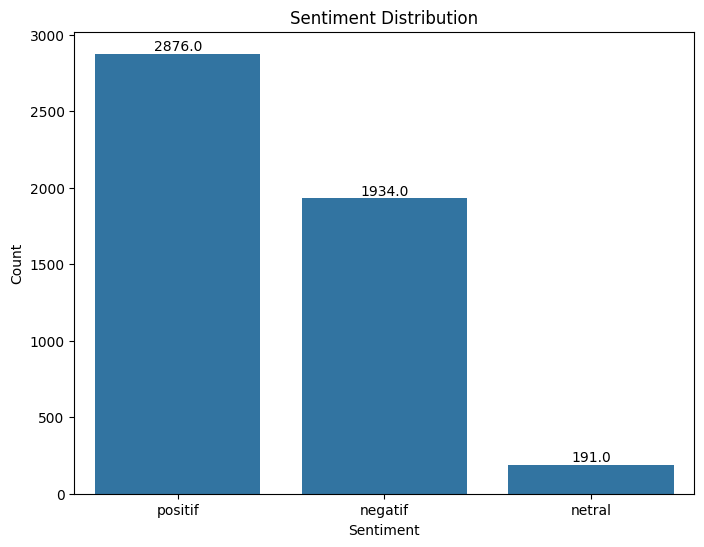

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sentimen', data=column_2)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

#5. Data Training

In [ ]:
df_counts = column_2['sentimen'].value_counts()
df_counts

,count
sentimen,
positif,2876
negatif,1934
netral,191


In [ ]:
X = column_2['content']
y = column_2['sentimen']

In [ ]:
X.shape,
y.shape

(5001,)

In [ ]:
data = {
    'review' : (X,y)
}

In [ ]:
result = []

for k, (X,y) in data.items():
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)

  vectorizer = CountVectorizer()
  X_train_vectorizer = vectorizer.fit_transform(X_train).toarray()
  X_test_vectorizer = vectorizer.transform(X_test).toarray()

  classifier = {
      'KNN' : KNeighborsClassifier(),
      'Random Forest' : RandomForestClassifier(),
      'Naive Bayes' : MultinomialNB(),
      'SVM' : SVC(kernel='linear')
  }

  for clf_name, clf in classifier.items():
    clf.fit(X_train_vectorizer, y_train)
    y_pred = clf.predict(X_test_vectorizer)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    result.append({
        'classifier' : clf_name,
        'accuracy' : accuracy,
        'recall' : recall,
        'precision' : precision,
        'f1' : f1
    })

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df_result = pd.DataFrame(result)
df_result

,classifier,accuracy,recall,precision,f1
0,KNN,0.668442,0.668442,0.685579,0.608257
1,Random Forest,0.878828,0.878828,0.843944,0.861019
2,Naive Bayes,0.881491,0.881491,0.888768,0.865538
3,SVM,0.862850,0.862850,0.849388,0.854708


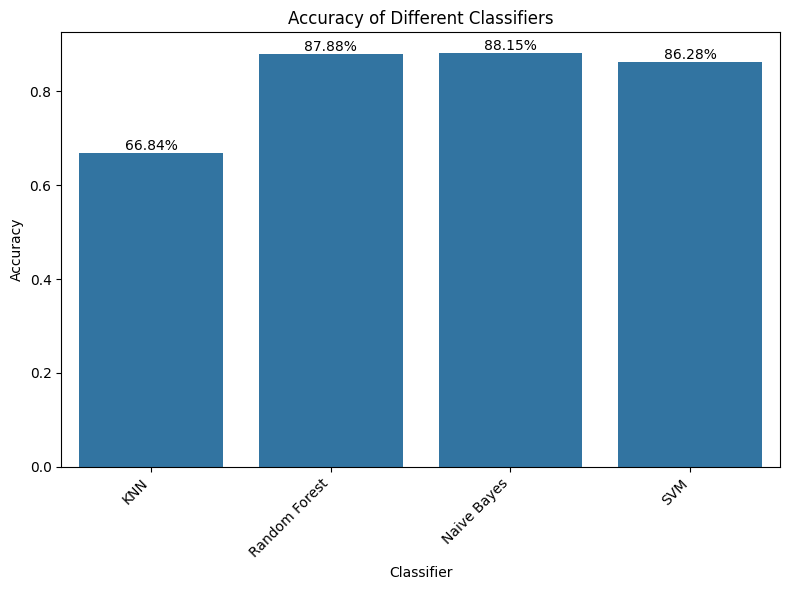

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='classifier', y='accuracy', data=df_result)
plt.title('Accuracy of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()